In [1]:
import matlab.engine
import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
eng = matlab.engine.start_matlab()

In [5]:
data = eng.load('data/slp.mat')['data'];
data = eng.permute(data, matlab.double([3, 2, 1]));

In [6]:
dirname   = 'SLP-res';
bfilename = dirname + '/slp';
eng.mkdir( dirname );

In [9]:
myOpts = eng.struct('cmethod', 'phase',
    'nTopEVs', 2, 'outlierThreshold', 0.7,
    'boolUseSavedData', 0,  'boolParfor', 0,
    'saveData', 3, 'kmethod', 'triangle',
    'spans', 21, 'errorRate', 0.1, 'bfilename', bfilename);

In [8]:
eng.tic;
Components, Clusters, ClusterInfo, SDFInfo = eng.pasf(data, 2, myOpts, nargout=4)
eng.toc;
Components = np.array(Components._data).reshape(Components.size, order='F')

In [10]:
print( "Component Shape: {}\n" .format(Components.shape) )
d1, d2, d3, d4 = Components.shape

Component Shape: (13, 33, 1000, 4)



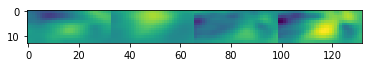

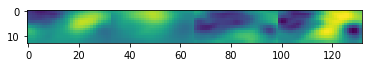

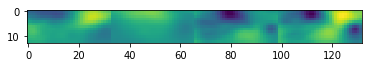

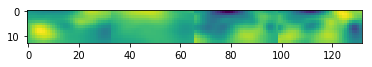

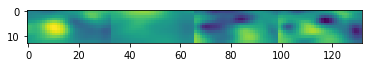

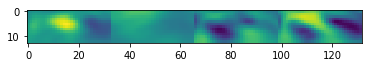

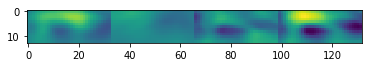

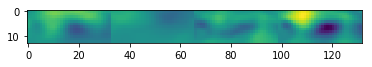

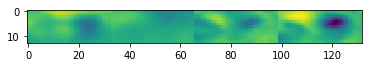

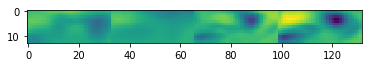

In [11]:
for i in range(10):
    fig = Components[:,:,i,0]
    for c in range(1, d4):
        fig = np.hstack((fig, Components[:,:,i,c]))
    plt.imshow(fig)
    plt.show(block=False)
    plt.close()